In [149]:
import pandas as pd
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from datetime import datetime

In [150]:
# Read the dataset cleaned
csv_path = 'jailbook_cleaned.csv'                    
df = pd.read_csv(csv_path).copy()
df.head()

Unnamed: 0                 Defendant                   Address  Zip  \
0           1            DITAS, MICHAEL          7484 NW 169 TERR  NaN   
1           4              DORSEY, JOHN  651 NW 177TH STREET  101  NaN   
2          16  GAITOR, RASHAD  ZAROSHUA                   UNKNOWN  NaN   
3          24         WILLIAMS, ALAN  J                   UNKNOWN  NaN   
4          29  WYNTER, KALONJI  ABAYOMI                  HOMELESS  NaN   

            City State                        Crime_Family  \
0          MIAMI    FL  THEFT, ROBBERY, AND RELATED CRIMES   
1  MIAMI GARDENS    FL                 ALCOHOL PROHIBITION   
2          MIAMI    FL                             WARRANT   
3          MIAMI    FL                 ALCOHOL PROHIBITION   
4       HOMELESS    FL                             WARRANT   

          Crime_Family1    Crime_Family2  Booking_year    ...     Booking_day  \
0     ASSAULT & BATTERY   PERSONAL CRIME          2015    ...               5   
1       DRUGS & ALCOHOL  STATUTORY CRIME          2015    ...               5   
2  MISCELLANEOUS CRIMES            OTHER          2015    ...               5   
3       DRUGS & ALCOHOL  STATUTORY CRIME          2015    ...               3   
4  MISCELLANEOUS CRIMES            OTHER          2015    ...               3   

   Booking_Date DOB_year  DOB_month  DOB_day  Date_of_birth Age  day_of_week  \
0      6/5/2015     1982          2       17      2/17/1982  37       Friday   
1      6/5/2015     1985          4       11      4/11/1985  34       Friday   
2      6/5/2015     1991          8       19      8/19/1991  27       Friday   
3      6/3/2015     1964          4       28      4/28/1964  55    Wednesday   
4      6/3/2015     1977          5       19      5/19/1977  42    Wednesday   

  Age_Crime    CityRN  
0        33     MIAMI  
1        30     MIAMI  
2        23     MIAMI  
3        51     MIAMI  
4        38  HOMELESS  

[5 rows x 21 columns]

## Rolling Mean and Starndard Deviation 

In [151]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [152]:
# Confirming Booking_date type. [We need it in datetime to do statistics]
df.dtypes

Unnamed: 0         int64
Defendant         object
Address           object
Zip              float64
City              object
State             object
Crime_Family      object
Crime_Family1     object
Crime_Family2     object
Booking_year       int64
Booking_month      int64
Booking_day        int64
Booking_Date      object
DOB_year           int64
DOB_month          int64
DOB_day            int64
Date_of_birth     object
Age                int64
day_of_week       object
Age_Crime          int64
CityRN            object
dtype: object

In [153]:
df[['Booking_Date']] = df[['Booking_Date']].apply(pd.to_datetime) ##Datetime

In [154]:
df.dtypes

Unnamed: 0                int64
Defendant                object
Address                  object
Zip                     float64
City                     object
State                    object
Crime_Family             object
Crime_Family1            object
Crime_Family2            object
Booking_year              int64
Booking_month             int64
Booking_day               int64
Booking_Date     datetime64[ns]
DOB_year                  int64
DOB_month                 int64
DOB_day                   int64
Date_of_birth            object
Age                       int64
day_of_week              object
Age_Crime                 int64
CityRN                   object
dtype: object

In [155]:
df['Date'] = df['Booking_Date'].dt.date #Convert to date
df['Time'] = df['Booking_Date'].dt.time 
df[['Date']] = df[['Date']].apply(pd.to_datetime)

df = df.reset_index(drop=True)

In [156]:
df.dtypes

Unnamed: 0                int64
Defendant                object
Address                  object
Zip                     float64
City                     object
State                    object
Crime_Family             object
Crime_Family1            object
Crime_Family2            object
Booking_year              int64
Booking_month             int64
Booking_day               int64
Booking_Date     datetime64[ns]
DOB_year                  int64
DOB_month                 int64
DOB_day                   int64
Date_of_birth            object
Age                       int64
day_of_week              object
Age_Crime                 int64
CityRN                   object
Date             datetime64[ns]
Time                     object
dtype: object

In [157]:
df.head()

Unnamed: 0                 Defendant                   Address  Zip  \
0           1            DITAS, MICHAEL          7484 NW 169 TERR  NaN   
1           4              DORSEY, JOHN  651 NW 177TH STREET  101  NaN   
2          16  GAITOR, RASHAD  ZAROSHUA                   UNKNOWN  NaN   
3          24         WILLIAMS, ALAN  J                   UNKNOWN  NaN   
4          29  WYNTER, KALONJI  ABAYOMI                  HOMELESS  NaN   

            City State                        Crime_Family  \
0          MIAMI    FL  THEFT, ROBBERY, AND RELATED CRIMES   
1  MIAMI GARDENS    FL                 ALCOHOL PROHIBITION   
2          MIAMI    FL                             WARRANT   
3          MIAMI    FL                 ALCOHOL PROHIBITION   
4       HOMELESS    FL                             WARRANT   

          Crime_Family1    Crime_Family2  Booking_year    ...     DOB_year  \
0     ASSAULT & BATTERY   PERSONAL CRIME          2015    ...         1982   
1       DRUGS & ALCOHOL  STATUTORY CRIME          2015    ...         1985   
2  MISCELLANEOUS CRIMES            OTHER          2015    ...         1991   
3       DRUGS & ALCOHOL  STATUTORY CRIME          2015    ...         1964   
4  MISCELLANEOUS CRIMES            OTHER          2015    ...         1977   

   DOB_month DOB_day  Date_of_birth  Age  day_of_week Age_Crime    CityRN  \
0          2      17      2/17/1982   37       Friday        33     MIAMI   
1          4      11      4/11/1985   34       Friday        30     MIAMI   
2          8      19      8/19/1991   27       Friday        23     MIAMI   
3          4      28      4/28/1964   55    Wednesday        51     MIAMI   
4          5      19      5/19/1977   42    Wednesday        38  HOMELESS   

        Date      Time  
0 2015-06-05  00:00:00  
1 2015-06-05  00:00:00  
2 2015-06-05  00:00:00  
3 2015-06-03  00:00:00  
4 2015-06-03  00:00:00  

[5 rows x 23 columns]

In [158]:
# Extracting week number and day
df['weekno'] = [df['Booking_Date'][i].isocalendar()[1] for i in range(len(df))]
df['day']=[df['Booking_Date'][i].weekday() for i in range(len(df))]

#Grouping
groups = df.groupby('Date').agg('count')
groupsWeekday = df.groupby('day').agg('count')
groupsWeek = df.groupby('weekno').agg('count')
groupsTime = df.groupby('Booking_Date').agg('count')
# groupsHour = pittdf.groupby('Hour').agg('count')
groups1 = groups[['Crime_Family1']]

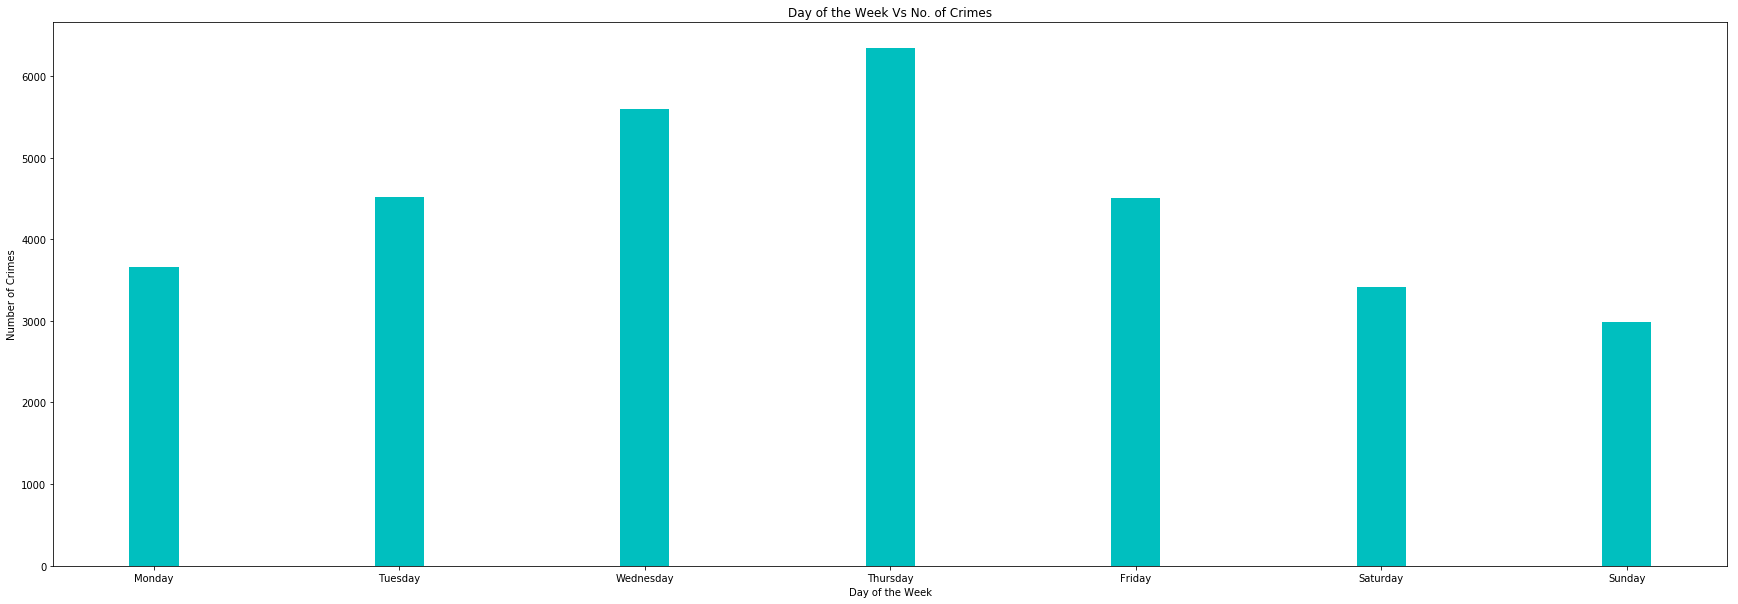

In [159]:
#Below is a plot for total crimes, for each day of the week. 

fig, ax = plt.subplots(figsize = (30,10))
fig.canvas.draw()
labels = ['0','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax.set_xticklabels(labels)
plt.title("Day of the Week Vs No. of Crimes")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.bar(groupsWeekday.index, groupsWeekday.Crime_Family1,width=0.2,color='c',align='center');

#We then checked individual crimes by Day of the week to see if there was any correlation. Three crimes stood out as having a clear difference - Obstructing Governmental Operations, Disorderly Conduct and Theft. The plots are below -

## Checking Stationarity

In [160]:
def stationarity_test(timeseries,values):
    
    #Determing the rolling statistics for a month for the data 
    rollingmean = timeseries.rolling(window=30,center=True).mean()
    rollingstd = timeseries.rolling(window=30,center=True).std()
    
    #Plotting the rolling statistics
    orig = plt.plot(timeseries, color='c',label='Original')
    mean = plt.plot(rollingmean, color='red', label='Rolling Mean')
    std = plt.plot(rollingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for the Time Series')
    plt.show(block=True)
    
    #Performing the Dickey-Fuller test:
    print('Results of the Dickey-Fuller Test:')
    dftest = adfuller(values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','P-value','No. of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

# The Dickey Fuller test code has been referenced from https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

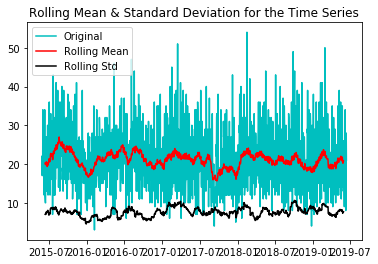

Results of the Dickey-Fuller Test:
Test Statistics                  -5.384357
P-value                           0.000004
No. of Lags Used                 23.000000
Number of Observations Used    1452.000000
Critical Value (1%)              -3.434862
Critical Value (5%)              -2.863533
Critical Value (10%)             -2.567831
dtype: float64


In [161]:
from statsmodels.tsa.stattools import adfuller

stationarity_test(groups1,groups1.Crime_Family1)

# Pending -> Census Data.


# Combining features

In [162]:
# Create a new column called 0-25 , 26-50 , >50 where the value is 1 if it is true and 0 if not

df['Age<25'] = np.where(df['Age_Crime']<=25, 1,0)
df['Age26-50'] = np.where((df['Age_Crime']>25) & (df['Age_Crime']<=50), 1,0)
df['Age>50'] = np.where(df['Age_Crime']>50, 1,0)

In [163]:
# Drop innecesary columns
df.drop(['Unnamed: 0','Zip','City', 'Date', 'Time','Crime_Family', 'Defendant', 'Address', 'Crime_Family2', 'Booking_day', 'Date_of_birth', 'Booking_Date', 'DOB_year', 'DOB_month', 'DOB_day'], axis=1, inplace=True)

df.head()

State         Crime_Family1  Booking_year  Booking_month  Age day_of_week  \
0    FL     ASSAULT & BATTERY          2015              6   37      Friday   
1    FL       DRUGS & ALCOHOL          2015              6   34      Friday   
2    FL  MISCELLANEOUS CRIMES          2015              6   27      Friday   
3    FL       DRUGS & ALCOHOL          2015              6   55   Wednesday   
4    FL  MISCELLANEOUS CRIMES          2015              6   42   Wednesday   

   Age_Crime    CityRN  weekno  day  Age<25  Age26-50  Age>50  
0         33     MIAMI      23    4       0         1       0  
1         30     MIAMI      23    4       0         1       0  
2         23     MIAMI      23    4       1         0       0  
3         51     MIAMI      23    2       0         0       1  
4         38  HOMELESS      23    2       0         1       0

In [164]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
crime_df = pd.get_dummies(df)
crime_df.head()
### END SOLUTION

Booking_year  Booking_month  Age  Age_Crime  weekno  day  Age<25  Age26-50  \
0          2015              6   37         33      23    4       0         1   
1          2015              6   34         30      23    4       0         1   
2          2015              6   27         23      23    4       1         0   
3          2015              6   55         51      23    2       0         0   
4          2015              6   42         38      23    2       0         1   

   Age>50  State_FL      ...       day_of_week_Monday  day_of_week_Saturday  \
0       0         1      ...                        0                     0   
1       0         1      ...                        0                     0   
2       0         1      ...                        0                     0   
3       1         1      ...                        0                     0   
4       0         1      ...                        0                     0   

   day_of_week_Sunday  day_of_week_Thursday  day_of_week_Tuesday  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   day_of_week_Wednesday  CityRN_FFOREIGN  CityRN_FOREIGN  CityRN_HOMELESS  \
0                      0                0               0                0   
1                      0                0               0                0   
2                      0                0               0                0   
3                      1                0               0                0   
4                      1                0               0                1   

   CityRN_MIAMI  
0             1  
1             1  
2             1  
3             1  
4             0  

[5 rows x 35 columns]

In [165]:
crime_df.dtypes

Booking_year                          int64
Booking_month                         int64
Age                                   int64
Age_Crime                             int64
weekno                                int64
day                                   int64
Age<25                                int32
Age26-50                              int32
Age>50                                int32
State_FL                              uint8
Crime_Family1_ABUSE                   uint8
Crime_Family1_ASSAULT & BATTERY       uint8
Crime_Family1_BURGLARY                uint8
Crime_Family1_CRIMINAL GANG           uint8
Crime_Family1_DRUGS & ALCOHOL         uint8
Crime_Family1_FIRE                    uint8
Crime_Family1_GAMBLING                uint8
Crime_Family1_HOMICIDE                uint8
Crime_Family1_KIDNAPPING              uint8
Crime_Family1_MISCELLANEOUS CRIMES    uint8
Crime_Family1_PROTEST                 uint8
Crime_Family1_SEXUAL MISCONDUCT       uint8
Crime_Family1_TREASON           

In [166]:
crime_df["PERSONAL CRIME"] = crime_df["Crime_Family1_ABUSE"] + crime_df["Crime_Family1_ASSAULT & BATTERY"] + crime_df["Crime_Family1_HOMICIDE"]+ crime_df["Crime_Family1_KIDNAPPING"]+ crime_df["Crime_Family1_SEXUAL MISCONDUCT"]
crime_df["PROPERTY CRIME"] = crime_df['Crime_Family1_FIRE'] + crime_df['Crime_Family1_BURGLARY'] + crime_df['Crime_Family1_PROTEST']
crime_df["STATUTORY CRIME"] = crime_df['Crime_Family1_DRUGS & ALCOHOL']
crime_df["OTHER CRIME"] = crime_df['Crime_Family1_CRIMINAL GANG'] + crime_df['Crime_Family1_GAMBLING'] + crime_df['Crime_Family1_MISCELLANEOUS CRIMES']+ crime_df['Crime_Family1_TREASON']+ crime_df['Crime_Family1_WHITE COLLAR']
crime_df.head()
# # #Removing extra features
# # df.drop(["% Vacant Units (2010)","% of all Bldgs. Condemned (2010)","#Robbery (2010)","#Burglary (2010)","#Auto Theft (2010)",'Resident Jobs: Information','Resident Jobs: Prof, scientific, admin, and waste mgmt','Resident Jobs: Prof, scientific, admin, and waste mgmt','Resident Jobs: Finance, insurance, real estate','Resident Jobs: Public admin', 'Resident Jobs: Construction', 'Resident Jobs: Manufacturing',
# #        'Resident Jobs: Retail Trade',
# #        'Resident Jobs: Transportation, warehousing, utilities',
# #        'Resident Jobs: Educ, health and social svc',
# #        'Resident Jobs: Arts, ent, recreation, accommodation and food services',
# #        'Edu. Attainment: Less than High School (2010)',
# #        'Edu. Attainment: High School Graduate (2010)',
# #        'Edu. Attainment: Assoc./Prof. Degree (2010)',
# #        "Edu. Attainment: Bachelor's Degree (2010)",
# #        'Edu. Attainment: Postgraduate Degree (2010)',
# #         '% Pop. Age 35-59 (2010)',
# #         '% Pop. Age 60-74 (2010)', '% Pop. Age > 75 (2010)'],axis = 1, inplace = True) 

# crimes = ['Part 1 Crime per 100 Persons (2010)', 'Part 2 Crime per 100 Persons (2010)']
all_crime_df = crime_df.drop(['CityRN_FOREIGN', 'CityRN_FFOREIGN','CityRN_MIAMI','CityRN_HOMELESS',
                             'Crime_Family1_CRIMINAL GANG', 'Crime_Family1_GAMBLING', 'Crime_Family1_MISCELLANEOUS CRIMES', 
                              'Crime_Family1_TREASON', 'Crime_Family1_WHITE COLLAR'], axis=1).dropna()

# Crime Prediction

In [167]:
# Returns fitted Gradient Boosting Regression model for the training data
def reg_gbr(X_train,Y_train):
    regr = ensemble.GradientBoostingRegressor()
    regr.fit(X_train, Y_train)
    return regr

# Given X and Y data corresponding to a type of crime, divide the data into training
# and test sets 85%/15% split, train the regression model, and predict the test data.
# Then, plot the accuracy (sorted for easier analysis) with the r^2 value
def run_regression(X,Y, plot_num, plot_name):
    scaler = preprocessing.MinMaxScaler(feature_range=(0.0, 1.0))
    X_scaled = scaler.fit_transform(X)
    Y_scaled = np.array(Y)

    numTrain = int(len(X_scaled) *.85)

    X_train = X_scaled[:numTrain]
    Y_train = Y_scaled[:numTrain]
    X_test, Y_test = zip(*sorted(zip(X_scaled[numTrain:],Y_scaled[numTrain:]), key=lambda x:x[1]))

    model_gbr = reg_gbr(X_train, Y_train)
    model_gbr_y = model_gbr.predict(X_test)
    
    r2 = metrics.r2_score(Y_test, model_gbr_y)
    
    plt.subplot(2,2,plot_num)
    plt.plot(Y_test)
    plt.plot(model_gbr_y)
    plt.axis('off')
    plt.title(plot_name + ": (r^2 value: %.2f)" % r2)
    plt.legend(['truth', 'prediction'], loc='upper left', prop={'size':7})

In [144]:
# all_data_values = all_data_values.reindex(np.random.permutation(all_data_values.index))
# X = all_data_values.drop(['Theft','Crime Per 100 Persons','#Agr. Assault (2010)','#Drug Violations (2010)'], axis=1)

# plt.figure(figsize=(8,5))

# Y = all_data_values['Theft'] / all_data_values['Pop. 2010'] * 100
# run_regression(X,Y,1, 'Theft')

# Y = all_data_values['#Agr. Assault (2010)'] / all_data_values['Pop. 2010'] * 100
# run_regression(X,Y,2, 'Agr. Assault')

# Y = all_data_values['#Drug Violations (2010)'] / all_data_values['Pop. 2010'] * 100
# run_regression(X,Y,3, 'Drug Violations')

# Y = all_data_values['Crime Per 100 Persons']
# run_regression(X,Y,4, 'Overall Crime')

# plt.tight_layout()

In [168]:
import numpy as np

all_crime_df = all_crime_df.reindex(np.random.permutation(all_crime_df.index))

In [172]:
X = all_crime_df.drop([
'PERSONAL CRIME',
'PROPERTY CRIME',
'STATUTORY CRIME'], axis=1)

plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [173]:
from sklearn import preprocessing, metrics, feature_selection, ensemble

Y = df['PERSONAL CRIME'] 
run_regression(X,Y,1, 'PERSONAL CRIME')

Y = crime_df['PROPERTY CRIME'] 
run_regression(X,Y,2, 'PROPERTY CRIME')

Y = crime_df['STATUTORY CRIME'] 
run_regression(X,Y,3, 'STATUTORY CRIME')


plt.tight_layout()

KeyError: 'PERSONAL CRIME'